# CHIPPR

This notebook demonstrates the use of the Cosmological Hierarchical Inference with Probabilistic Photometric Redshifts (CHIPPR) package to estimate the redshift density function.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import chippr
from chippr import *

/Users/aimalz/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
help(chippr)

Help on package chippr:

NAME
    chippr

FILE
    /Users/aimalz/anaconda/lib/python2.7/site-packages/chippr-0.1-py2.7.egg/chippr/__init__.py

PACKAGE CONTENTS
    catalog
    discrete
    gauss
    gmix
    int_pr_fun
    interim_prior
    lik_fun
    likelihood
    log_z_dens
    plot_utils
    post_fun
    posterior
    sim
    sim_utils
    utils
    z_dens

SUBMODULES
    pu
    su
    u

DATA
    __loader__ = <zipimporter object "/Users/aimalz/anaconda/lib/python2.7...
    a_mle = 1.0
    a_stk = 1.0
    a_tru = 1.0
    c_mle = 'k'
    c_stk = 'k'
    c_tru = 'k'
    d_mle = [(0, (1, 1))]
    d_stk = [(0, (3, 2))]
    d_tru = [(0, (1, 0.0001))]
    eps = 2.220446049250313e-16
    l_mle = 'MMLE '
    l_stk = 'Stacked '
    l_tru = 'True '
    lnz = r'$\ln[n(z)]$'
    nz = '$n(z)$'
    s_mle = '--'
    s_stk = '--'
    s_tru = '--'
    w_mle = 2.0
    w_stk = 1.5
    w_tru = 0.5




## Simulation

In [3]:
tru_amps = np.array([0.20, 0.35, 0.55])
tru_means = np.array([0.5, 0.2, 0.75])
tru_sigmas = np.array([0.4, 0.2, 0.1])

tru_nz = gmix(tru_amps, tru_means, tru_sigmas, limits=(0., 1.))

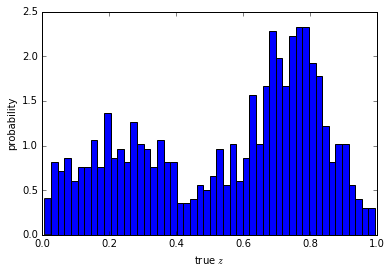

In [4]:
N = int(1e3)

tru_zs = tru_nz.sample(N)

plt.hist(tru_zs, bins=50, normed=1)
plt.xlabel(r'true $z$')
plt.ylabel(r'probability')

In [5]:
params = {}

In [6]:
lf_sigma = 0.05

params['constant_sigma'] = lf_sigma

In [7]:
bin_ends = np.array([0., 1.])
weights = np.array([1.])

int_prior = discrete(bin_ends, weights)

In [8]:
posteriors = catalog(params)
output = posteriors.create(tru_zs, int_prior)

data = output['interim_posteriors']

{'constant_sigma': 0.05}
(array([  2.71741674e-05,   9.98871510e-02,   1.99747128e-01,
         2.99607105e-01,   3.99467082e-01,   4.99327058e-01,
         5.99187035e-01,   6.99047012e-01,   7.98906989e-01,
         8.98766966e-01,   9.98626943e-01]), (11,))


In [9]:
print(np.shape(np.sum(data, axis=0)))

(10,)


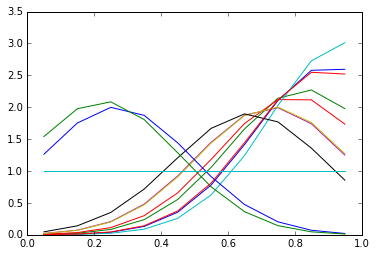

In [10]:
for datum in data[:10]:
    plt.plot(posteriors.x_coarse, datum)
plt.plot(posteriors.x_coarse, int_prior.evaluate(posteriors.x_coarse))

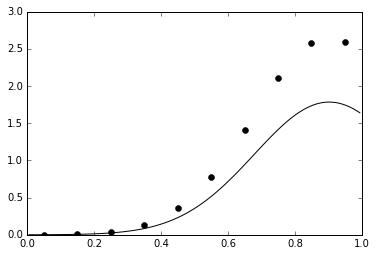

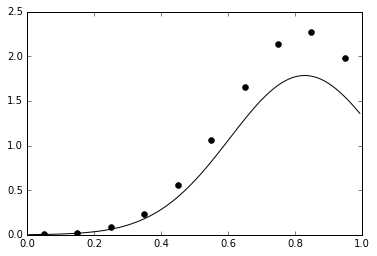

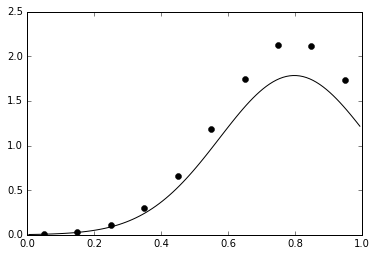

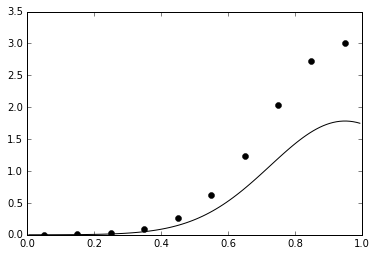

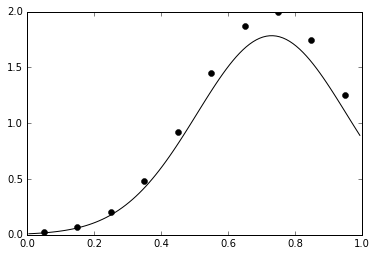

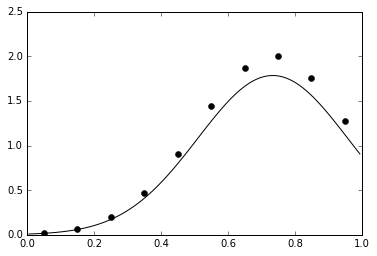

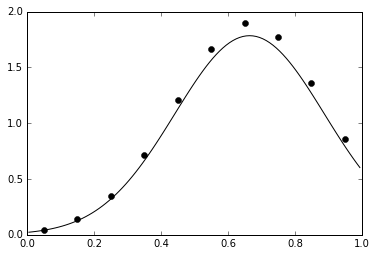

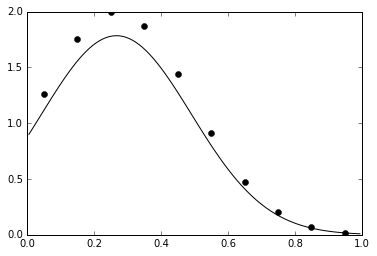

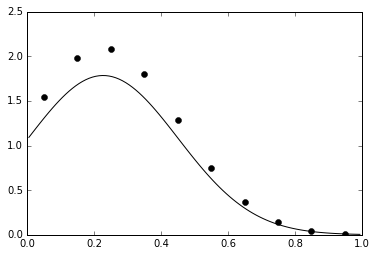

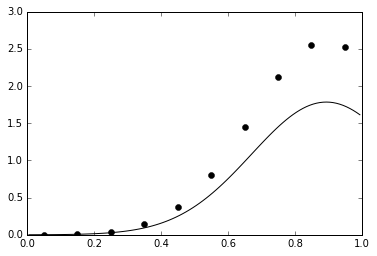

In [11]:
for n, z in enumerate(data[:10]):
    plt.plot(posteriors.x_coarse, data[n], 'ko')
    plt.plot(posteriors.x_fine, posteriors.obs_lfs[n], 'k-')
    plt.show()

## Inference

In [12]:
# data_loc = '../../../prob-z/nz/code/tests/sig2/data/logdata.csv'

# with open(data_loc,'rb') as data_file:
#     tuples = (line.split(None) for line in data_file)
#     data = [[float(pair[k]) for k in range(0,len(pair))] for pair in tuples]

In [13]:
zs = output['bin_ends']
nz_intp = output['interim_prior']
z_posts = data

print(np.shape(zs), np.shape(nz_intp), np.shape(z_posts))

z_mids = (zs[1:]+zs[:-1])/2.
n_bins = len(z_mids)

((11,), (10,), (1000, 10))


In [14]:
prior_sigma = 0.16
prior_var = np.eye(n_bins)
for b in range(n_bins):
    prior_var[b] = 1. * np.exp(-0.5 * (z_mids[b] - z_mids) ** 2 / prior_sigma ** 2)
l = 1.e-4
prior_var = prior_var+l*np.identity(n_bins)

prior_mean = nz_intp
prior = gauss(prior_mean, prior_var)

In [15]:
nz = log_z_dens(output, prior, truth=tru_nz, vb=True)

1.0
10 bins, 1000 interim posterior PDFs


In [16]:
nz_mmle = nz.optimize(np.log(nz_intp))

('starting at', array([ 0.00140121,  0.00140121,  0.00140121,  0.00140121,  0.00140121,
        0.00140121,  0.00140121,  0.00140121,  0.00140121,  0.00140121]), 6.5684210547154286e-06)
 final_simplex: (array([[-2.07070988, -1.40956933,  0.03590807,  0.76715517,  0.61547535,
         0.99345057,  1.61541192,  0.84492321, -0.57826653, -0.60650531],
       [-2.07073947, -1.40956354,  0.03589715,  0.76711184,  0.61548604,
         0.99349499,  1.61542057,  0.84492748, -0.5782557 , -0.60650471],
       [-2.07063077, -1.40957619,  0.03587041,  0.76711387,  0.61547838,
         0.99345718,  1.61538414,  0.84492184, -0.57823251, -0.60651023],
       [-2.07076626, -1.40959739,  0.03591705,  0.76716297,  0.6154961 ,
         0.99347651,  1.61544232,  0.84494919, -0.57828309, -0.60651927],
       [-2.07073539, -1.40950118,  0.03593867,  0.76708439,  0.6154448 ,
         0.99348798,  1.61542089,  0.84488096, -0.57827724, -0.60647456],
       [-2.07071695, -1.4095388 ,  0.03589066,  0.76712155,  0

In [17]:
nz_stack = nz.stack()

1.0


In [18]:
print(nz_mmle)
print(nz_stack)
print(nz.log_hyper_posterior(np.log(nz_intp)))

[-2.07070988 -1.40956933  0.03590807  0.76715517  0.61547535  0.99345057
  1.61541192  0.84492321 -0.57826653 -0.60650531]
[-0.49584351 -0.24057159 -0.06730442  0.05233645  0.13897538  0.1967984
  0.21315083  0.16615575  0.03261901 -0.2081732 ]
-3.28421052736e-06


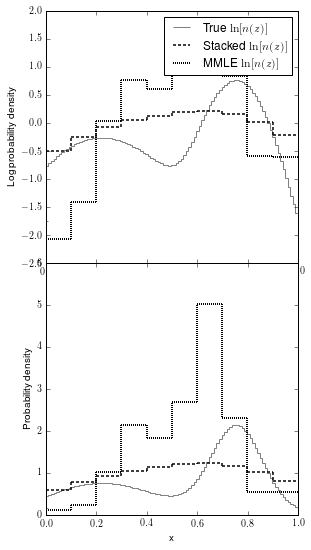

In [19]:
nz.plot()

In [20]:
nz_mmap = nz.mmap()

In [21]:
nz_mexp = nz.mexp()

In [ ]:
#nz_samps = nz.sample()